In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('F://Cyprus//CSV-01-12//01-12//Slowloris.csv')

In [7]:
df.columns

Index(['Unnamed: 0', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol',
       'timestamp', 'flow_duration', 'flow_byts_s', 'flow_pkts_s',
       'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt',
       'psh_flag_cnt', 'ack_flag_c

In [8]:
df.columns

Index(['Unnamed: 0', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol',
       'timestamp', 'flow_duration', 'flow_byts_s', 'flow_pkts_s',
       'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt',
       'psh_flag_cnt', 'ack_flag_c

In [10]:
totlen_fwd_pkts = df['totlen_fwd_pkts']
pd.unique(totlen_fwd_pkts)

array([    1264,       68,      775,      185,       77,      369,
            367,      368,       88,      409,      408,      407,
             60,      735,     1224,      815,      366,       59,
           8625,     6451,     6803,     6495,     6843,     2775,
           3352,       67,     3782,     1286,     2305,     1085,
             66,     1579,     8819,     1071,       62,     1243,
             87,    38566,     1326,     6984,     2221,    38188,
           1389,      863,     1303,     1279,     1343,     3626,
            406,     1987,      100,     2102,    35347,     7144,
           1119,     1143,     1263,    10595,    11503,     1304,
           3663,     1366,      156,    40164,     1196,     2232,
           3578,      991,    25996,    89813,      419,      459,
            458,      460,      457,      418,      420,    65654,
          24206,     1446,     1242,       61,     4702,     2740,
           4018,    40558,     5737,     1144,    10516,     7

In [11]:
flow_byts_s=df['flow_byts_s']
pd.unique(flow_byts_s)

array([ 2094.49585972,  4148.9020309 ,   735.06512174, ...,
       31719.86461157,   891.85358941, 15435.98646833])

In [13]:
flow_pkts_s=df['flow_pkts_s']
pd.unique(flow_pkts_s)

array([ 8.31620591, 45.84422134,  9.18332309, ..., 57.31084051,
       12.21717246, 42.04558793])

In [14]:
flow_duration=df['flow_duration']
pd.unique(flow_duration)

array([2525190.,   43626., 2504540., ...,  296628.,  163704.,  570809.])

In [16]:
bwd_pkts_s=df['bwd_pkts_s']
pd.unique(bwd_pkts_s)

array([ 4.35610786, 22.92211067,  4.791299  , ..., 30.34103321,
        6.10858623, 21.02279396])

In [17]:
flow_iat_max=df['flow_iat_max']
pd.unique(flow_iat_max)

array([1942423.,       0., 1642366., ..., 1259118.,   88367.,  149195.])

In [18]:
flow_iat_mean=df['flow_iat_mean']
pd.unique(flow_iat_mean)

array([126259.5       ,      0.        , 113842.72727273, ...,
        89422.43333333,  18539.25      ,  24817.7826087 ])

In [19]:
labels=df['Label']
pd.unique(labels)

array(['benign', 'attack'], dtype=object)

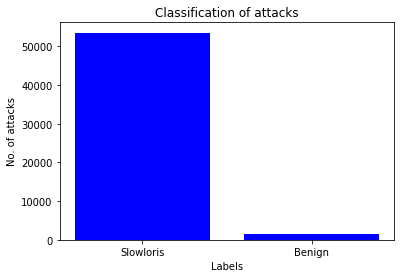

In [24]:
data = {'Slowloris':df['Label'].value_counts().attack, 'Benign':df['Label'].value_counts().benign}
courses = list(data.keys())
values = list(data.values())
plt.bar(courses, values, color ='blue')
plt.xlabel("Labels")
plt.ylabel("No. of attacks")
plt.title("Classification of attacks")
plt.show()

In [34]:
data = [df['flow_byts_s'], df['flow_pkts_s'],df['flow_duration'], df['bwd_pkts_s'],df['flow_iat_max'], df['flow_iat_mean'],df['Label']]

In [35]:
headers=['flow_byte','flow_pkt','flow_duration','bwd_pkt','flow_iat_max','flow_iat_mean','label']

In [36]:
df1 = pd.concat(data, axis=1, keys=headers)

In [37]:
df1

,flow_byte,flow_pkt,flow_duration,bwd_pkt,flow_iat_max,flow_iat_mean,label
0,2094.495860,8.316206,2525190.0,4.356108,1942423.0,126259.500000,benign
1,4148.902031,45.844221,43626.0,22.922111,0.0,0.000000,benign
2,735.065122,9.183323,2504540.0,4.791299,1642366.0,113842.727273,benign
3,1075.499313,18.479370,270572.0,7.391748,246293.0,67643.000000,benign
4,981.793380,8.688437,230191.0,4.344218,0.0,0.000000,benign
...,...,...,...,...,...,...,...
54961,1468.012966,14.903685,134195.0,7.451842,0.0,0.000000,benign
54962,1187.578805,14.661467,136412.0,7.330733,0.0,0.000000,benign
54963,31719.864612,57.310841,296628.0,30.341033,88367.0,18539.250000,benign
54964,891.853589,12.217172,163704.0,6.108586,0.0,0.000000,benign


In [38]:
df1.to_csv("slowloris_attributes.csv")

# Model Creation

In [39]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

In [40]:
Encoder = LabelEncoder()
le = Encoder.fit(df1["label"])
df1["label"] = le.transform(df1["label"])

In [41]:
pd.unique(df1['label'])
# 1 = Benign
# 0 = Attack

array([1, 0])

In [42]:
df1

,flow_byte,flow_pkt,flow_duration,bwd_pkt,flow_iat_max,flow_iat_mean,label
0,2094.495860,8.316206,2525190.0,4.356108,1942423.0,126259.500000,1
1,4148.902031,45.844221,43626.0,22.922111,0.0,0.000000,1
2,735.065122,9.183323,2504540.0,4.791299,1642366.0,113842.727273,1
3,1075.499313,18.479370,270572.0,7.391748,246293.0,67643.000000,1
4,981.793380,8.688437,230191.0,4.344218,0.0,0.000000,1
...,...,...,...,...,...,...,...
54961,1468.012966,14.903685,134195.0,7.451842,0.0,0.000000,1
54962,1187.578805,14.661467,136412.0,7.330733,0.0,0.000000,1
54963,31719.864612,57.310841,296628.0,30.341033,88367.0,18539.250000,1
54964,891.853589,12.217172,163704.0,6.108586,0.0,0.000000,1


In [44]:
df_maj = df1[df1['label']==0]
df_min = df1[df1['label']==1]
df_maj = df_maj.sample(n=10000)
df_maj = pd.concat([df_maj,df_min], axis=0)

In [45]:
len(df_maj)

11403

In [46]:
len(df_min)

1403

In [47]:
X = df_maj.drop('label',axis=1)
y = df_maj['label']

In [48]:
X

,flow_byte,flow_pkt,flow_duration,bwd_pkt,flow_iat_max,flow_iat_mean
25988,262.115635,3.912174,2044899.0,1.956087,2041397.0,2.921284e+05
7590,257.454673,4.186255,2388770.0,2.093127,2380500.0,2.654189e+05
37819,221.539143,3.306554,2419437.0,1.653277,2413725.0,3.456339e+05
40757,34.476310,0.552505,18099385.0,0.276252,17133714.0,2.011043e+06
22547,251.651787,3.749002,2133901.0,1.874501,2129286.0,3.048430e+05
...,...,...,...,...,...,...
54961,1468.012966,14.903685,134195.0,7.451842,0.0,0.000000e+00
54962,1187.578805,14.661467,136412.0,7.330733,0.0,0.000000e+00
54963,31719.864612,57.310841,296628.0,30.341033,88367.0,1.853925e+04
54964,891.853589,12.217172,163704.0,6.108586,0.0,0.000000e+00


In [50]:
# train and test split from newly created dataset 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=32, shuffle=True)

In [51]:
y_test.value_counts()

0    2490
1     361
Name: label, dtype: int64